# L11 Hierarchical Modeling - "Statistics.xlsx"
- Q1: How are shape of 2 and scale (rate) of 1/5 determined in dgamma() for mu?
-  The choice of these parameters is based on the specific problem being solved and the prior knowledge of the data
-  The shape and scale parameters can be chosen based on the mean and variance of the data, or they can be chosen based on prior knowledge of the distribution. In some cases, the choice of parameters may be arbitrary or based on trial and error
-  **Adjust mu ~ dgamma(2, 1/5) setting** to be closer to "a place" where streams_m average would be in the outcome of **colMeans()**!!!

In [1]:
library(tidyverse)
library(dplyr)
library(data.table)

#df1 <- read.csv("./data/spotify_output_11012023.csv")

#df_m1 <- df1 %>% select(-comment)

#df_m1 <- df_m1[df_m1$outlier != 1,]

# Create a data.frame (df_hm1) with Taylor and N=50 from others, randomly select

#df_nts <- df_m1[df_m1$artist4 != "Taylor Swift",]
#df_ts <-  df_m1[df_m1$artist4 == "Taylor Swift",]

#set.seed(101)

#df_subsample_1 <- df_nts %>% sample_n(50)
#df_hm1 <- rbind(df_ts, df_subsample_1)
#df_hm1$ts <- 0
#df_hm1$ts[df_hm1$artist4 == 'Taylor Swift'] <-1

# Create a data.frame (df_hm2) with Taylor and other Top6 singers to make it Top7 dataset.
#df_hm2 <- df_m1
#df_hm2$artist5 <- 0
#df_hm2$artist5[df_hm2$artist4 == 'Taylor Swift'] <-1
#df_hm2$artist5[df_hm2$artist4 == 'The Weeknd'] <-2
#df_hm2$artist5[df_hm2$artist4 == 'Bad Bunny'] <-3
#df_hm2$artist5[df_hm2$artist4 == 'Drake'] <-4
#df_hm2$artist5[df_hm2$artist4 == 'Harry Styles'] <-5
#df_hm2$artist5[df_hm2$artist4 == 'Ed Sheeran'] <-6
#df_hm2$artist5[df_hm2$artist4 == 'SZA'] <-7
#df_hm2 <-df_hm2[df_hm2$artist5 != 0,]
#summary(df_hm1)
#nrow(df_hm1)

#summary(df_hm2)
#nrow(df_hm2)

#fwrite(df_hm1, "C:\\Users\\truev\\Documents\\Research\\Misc\\Spotify\\2023\\data\\spotify_hm1_11152023.csv") 
#fwrite(df_hm2, "C:\\Users\\truev\\Documents\\Research\\Misc\\Spotify\\2023\\data\\spotify_hm2_11152023.csv")
#nrow(df_ts)
#summary(df_m1)
#R.Version() --- DataExplorer is under newer R version(4.3.2) - Oct31.2023

── Attaching core tidyverse packages ───────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [2]:
df_hm1 <- read.csv("./data/spotify_hm1_11152023.csv")
df_hm2 <- read.csv("./data/spotify_hm2_11152023.csv")

df_hm1$streams_m <- as.integer(df_hm1$streams_m)
df_hm2$streams_m <- as.integer(df_hm2$streams_m)

#str(df_hm1)
#str(df_hm2)

In [3]:
table(df_hm1$ts)
table(df_hm2$artist5)


 0  1 
50 37 


 1  2  3  4  5  6  7 
37 35 26 19 17 13 23 

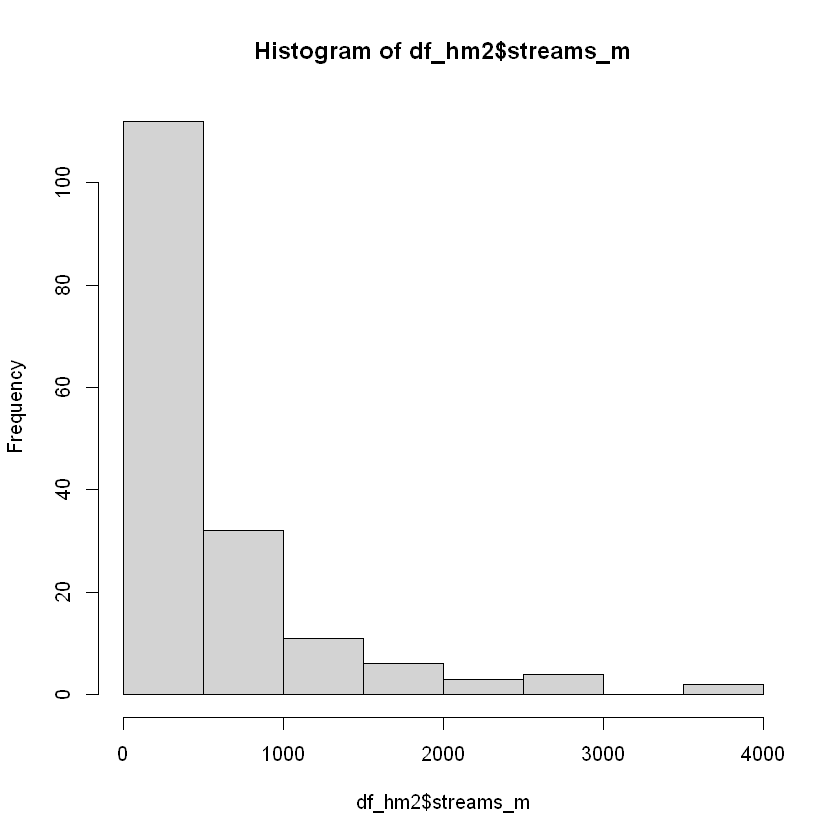

In [4]:
hist(df_hm2$streams_m)

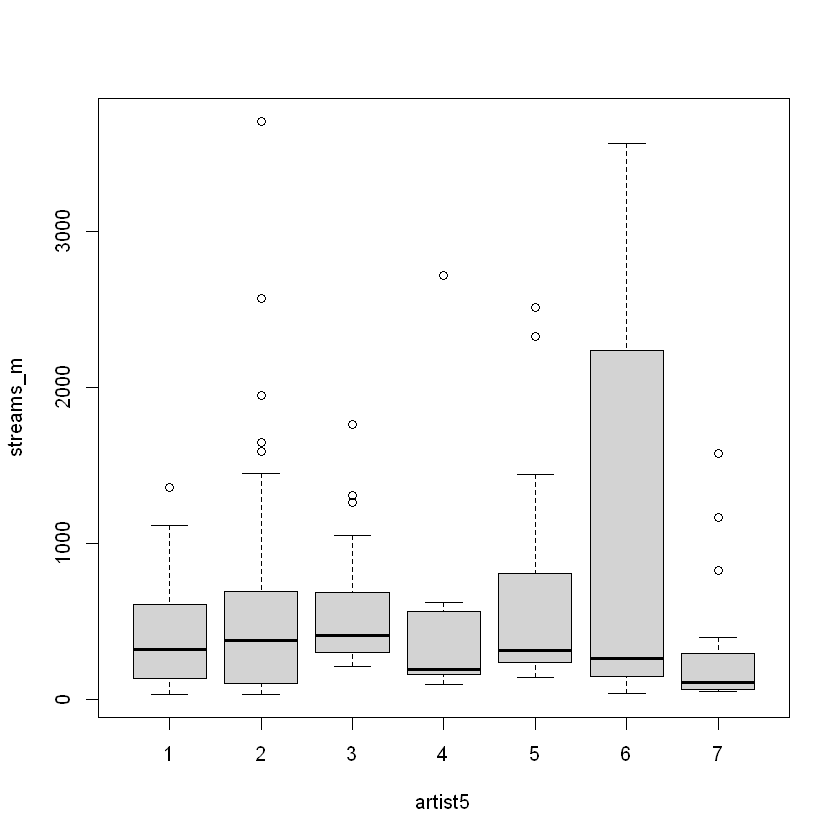

In [5]:
boxplot(streams_m ~ artist5, data=df_hm2)

In [6]:
set.seed(112)
n_sim = 500
alpha_pri = rexp(n_sim, rate=1.0/2.0)
beta_pri = rexp(n_sim, rate=5.0)
mu_pri = alpha_pri/beta_pri
sig_pri = sqrt(alpha_pri/beta_pri^2)

summary(mu_pri)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.021    2.983    9.852   61.127   29.980 4858.786 

In [7]:
summary(sig_pri)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   0.1834    3.3663    8.5488   41.8137   22.2219 2865.6461 

In [8]:
lam_pri = rgamma(n=n_sim, shape=alpha_pri, rate=beta_pri)
summary(lam_pri)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.000     1.171     7.667    83.062    28.621 11005.331 

In [9]:
(lam_pri = rgamma(n=5, shape=alpha_pri[1:5], rate=beta_pri[1:5]))

[1] 66.444084  9.946688  6.028319 15.922568 47.978587

In [10]:
(y_pri = rpois(n=150, lambda=rep(lam_pri, each=30)))

[1] 63 58 64 63 70 62 61 48 71 73 70 77 66 60 72 77 69 62 66 71 49 80 66 75 74
 [26] 55 62 90 65 57 12  9  7 10 12 10 11  7 14 13  9  6  6 13  7 10 12  9  9 10
 [51]  7  8  6  9  7 10 13 13  8 12  6 10  3  6  7  4  6  7  5  5  4  3  6  2  8
 [76]  4  8  4  5  7  1  4  5  3  8  8  3  1  7  3 16 14 13 17 17 12 13 13 16 16
[101] 15 14 11 10 13 17 16 19 16 17 15 16  7 17 21 16 12 15 14 13 52 44 51 46 39
[126] 40 40 44 46 59 45 49 58 42 31 52 43 47 53 41 48 57 35 60 51 58 36 34 41 59

In [11]:
library("rjags")

Loading required package: coda

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs



Warning message in jags.model(textConnection(mod_string), data = data_jags, n.chains = 3):
"Unused variable "track_name" in data"
Warning message in jags.model(textConnection(mod_string), data = data_jags, n.chains = 3):
"Unused variable "artist_name" in data"
Warning message in jags.model(textConnection(mod_string), data = data_jags, n.chains = 3):
"Unused variable "artist_count" in data"
Warning message in jags.model(textConnection(mod_string), data = data_jags, n.chains = 3):
"Unused variable "released_year" in data"
Warning message in jags.model(textConnection(mod_string), data = data_jags, n.chains = 3):
"Unused variable "released_month" in data"
Warning message in jags.model(textConnection(mod_string), data = data_jags, n.chains = 3):
"Unused variable "released_day" in data"
Warning message in jags.model(textConnection(mod_string), data = data_jags, n.chains = 3):
"Unused variable "in_spotify_playlists" in data"
Warning message in jags.model(textConnection(mod_string), data = dat

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 170
   Unobserved stochastic nodes: 9
   Total graph size: 358

Initializing model



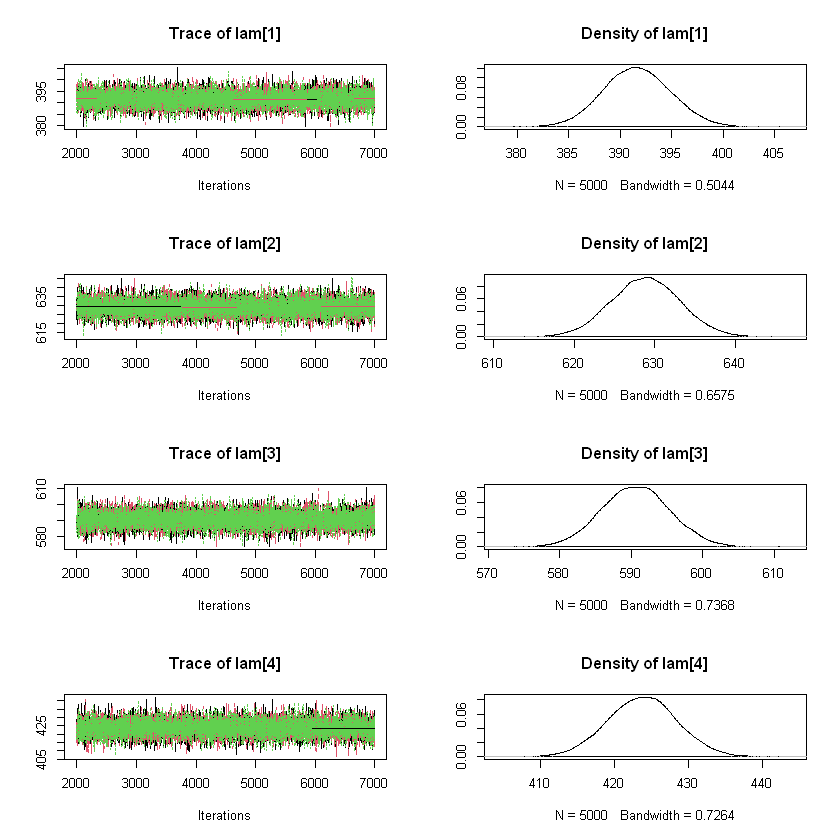

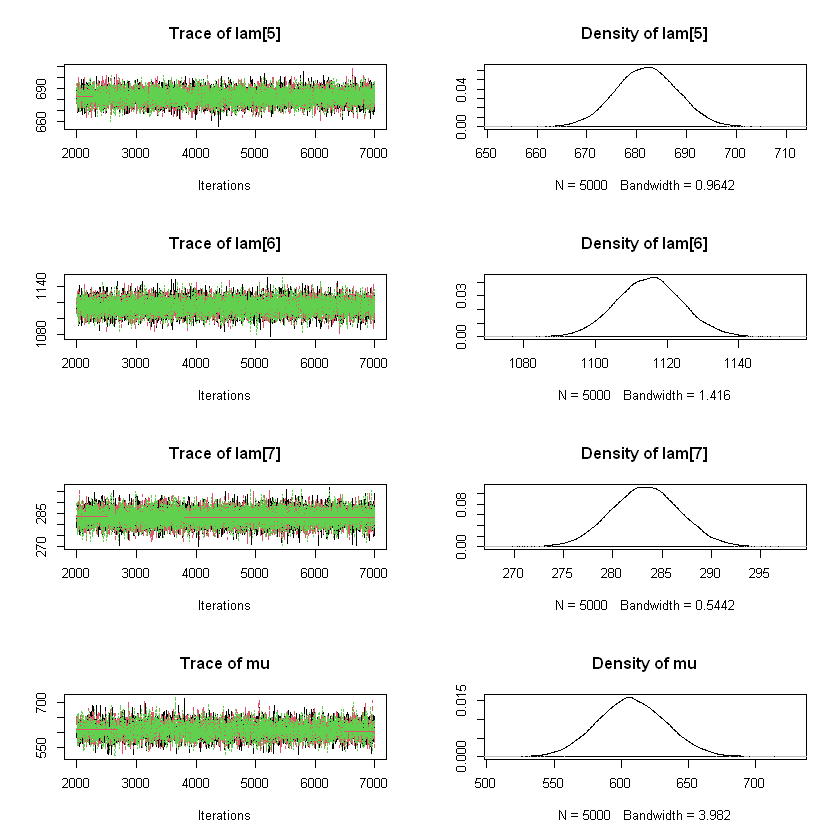

Potential scale reduction factors:

       Point est. Upper C.I.
lam[1]          1          1
lam[2]          1          1
lam[3]          1          1
lam[4]          1          1
lam[5]          1          1
lam[6]          1          1
lam[7]          1          1
mu              1          1
sig             1          1

Multivariate psrf

1

,lam[1],lam[2],lam[3],lam[4],lam[5],lam[6],lam[7],mu,sig
Lag 0,1.000000000,1.0000000000,1.000000000,1.000000000,1.000000000,1.0000000000,1.000000000,1.000000000,1.000000000
Lag 1,-0.016290443,-0.0198606050,0.001002684,-0.009970487,0.003358555,0.0196828325,-0.006467072,0.401058403,0.409229362
Lag 5,0.000249243,-0.0003403046,-0.007625921,-0.005566338,-0.013390713,0.0004250693,-0.005797561,0.008700381,0.016498832
Lag 10,-0.011576397,0.0058168010,0.006653193,-0.004705302,0.012685462,0.0058392753,0.005795769,-0.015357254,-0.006828845
Lag 50,-0.006857050,0.0030661882,-0.014329754,0.012460788,0.001385289,-0.0011220638,-0.007800190,0.002650107,0.009335136


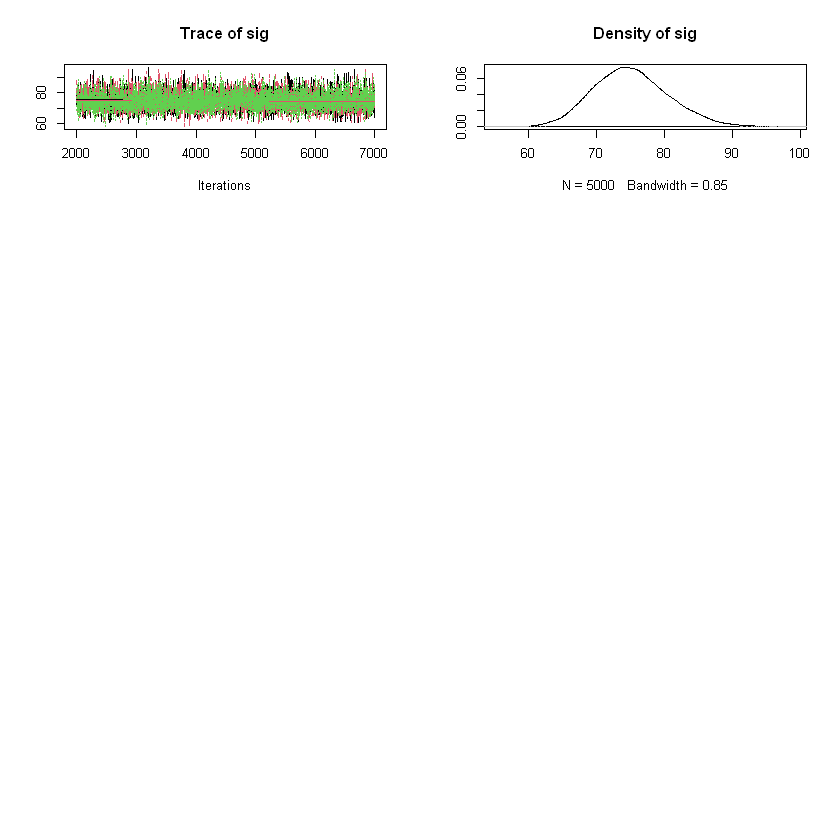

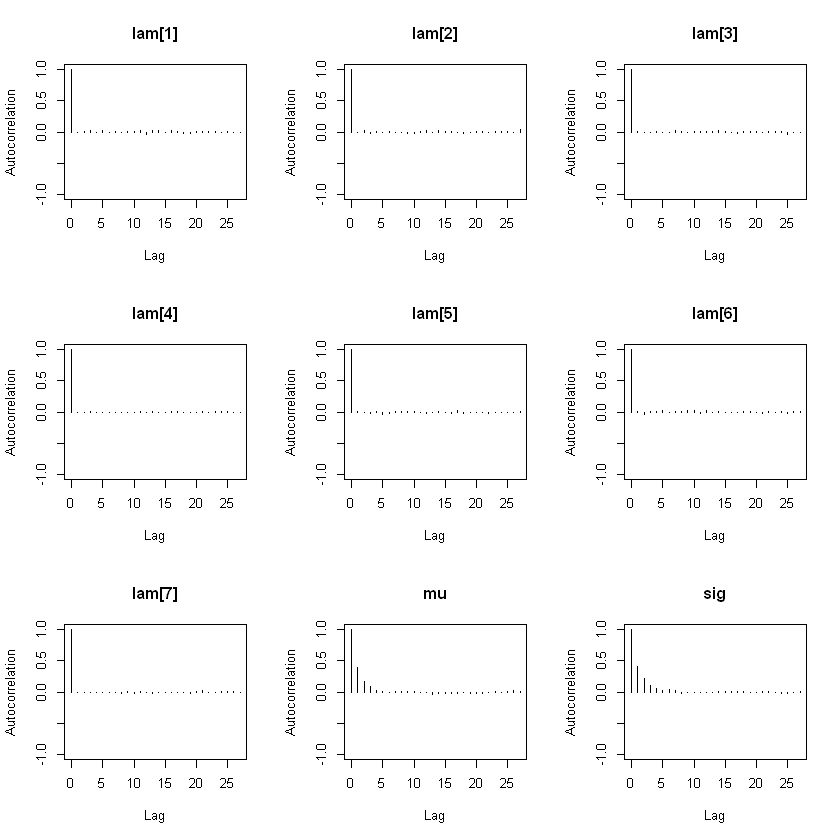

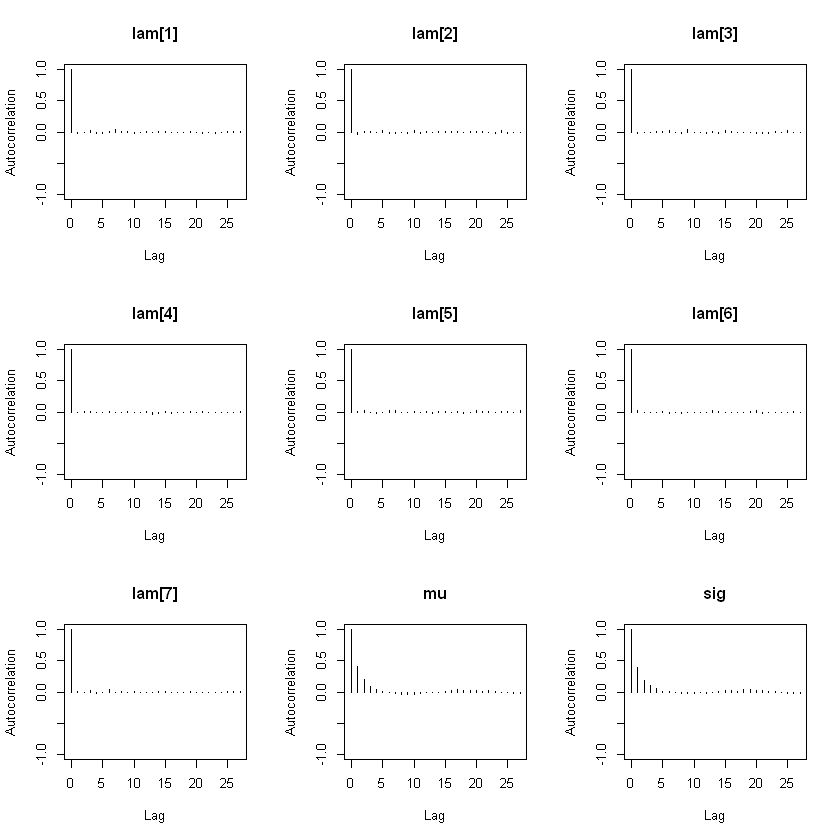

lam[1]    lam[2]    lam[3]    lam[4]    lam[5]    lam[6]    lam[7]        mu 
15058.692 15595.750 14810.446 15000.000 15240.445 15566.900 15018.558  5981.237 
      sig 
 5829.830

Mean deviance:  88038 
penalty 6.943 
Penalized deviance: 88045 

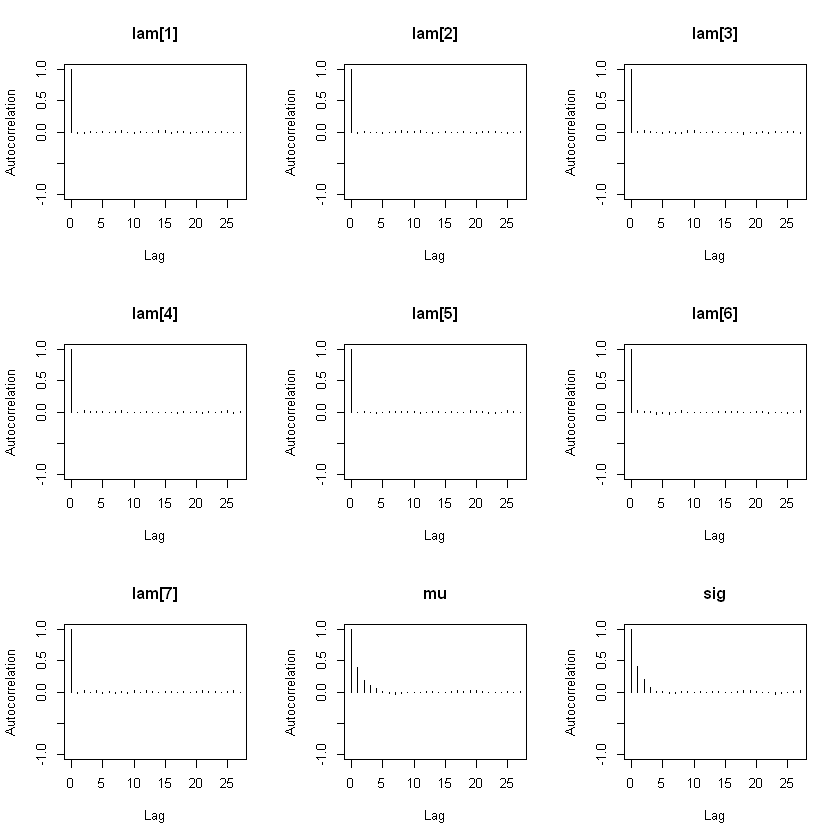

In [12]:
mod_string = " model {
for (i in 1:length(streams_m)) {
  streams_m[i] ~ dpois(lam[artist5[i]])
}

for (j in 1:max(artist5)) {
  lam[j] ~ dgamma(alpha, beta)
}

alpha = mu^2 / sig^2
beta = mu / sig^2

mu ~ dgamma(150.0, 1.0/10.0)
sig ~ dexp(1.0)

} "

set.seed(113)

data_jags = as.list(df_hm2)

params = c("lam", "mu", "sig")

mod = jags.model(textConnection(mod_string), data=data_jags, n.chains=3)
update(mod, 1e3)

mod_sim = coda.samples(model=mod,
                       variable.names=params,
                       n.iter=5e3)
mod_csim = as.mcmc(do.call(rbind, mod_sim))

## convergence diagnostics
plot(mod_sim)

gelman.diag(mod_sim)
autocorr.diag(mod_sim)
autocorr.plot(mod_sim)
effectiveSize(mod_sim)

## compute DIC
dic = dic.samples(mod, n.iter=1e3)
dic

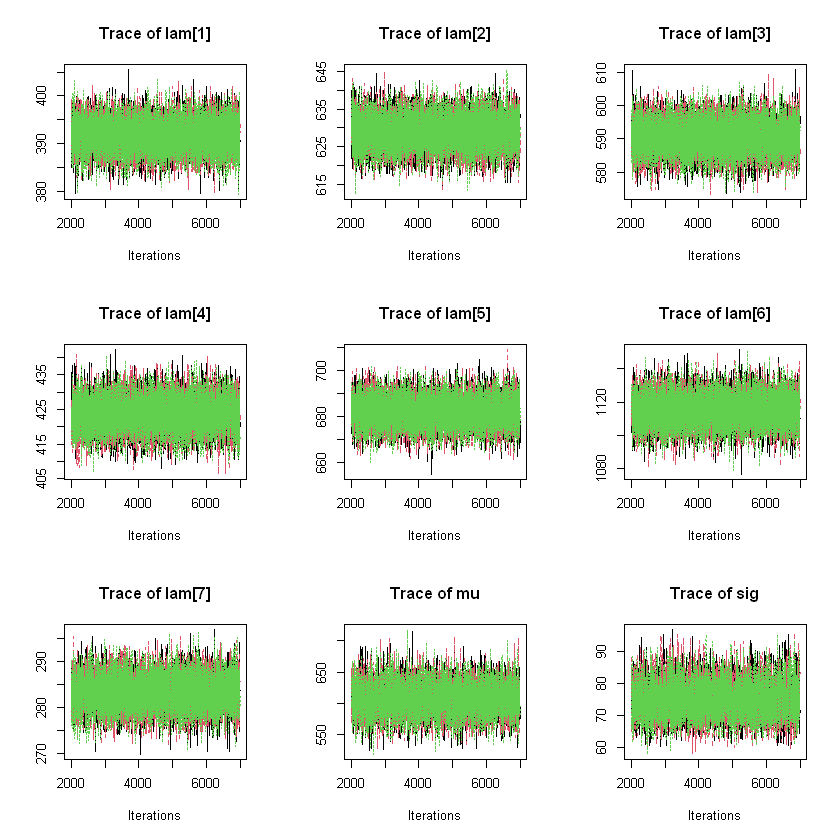

In [13]:
#library(jagsUI)
#par(mfrow = c(3, 4))
#traceplot(mod_sim)

par(mfrow = c(3, 3))
traceplot(mod_sim)
#plot(mod_sim)

Warning message:
"package 'jagsUI' was built under R version 4.3.2"

Attaching package: 'jagsUI'


The following object is masked from 'package:coda':

    traceplot




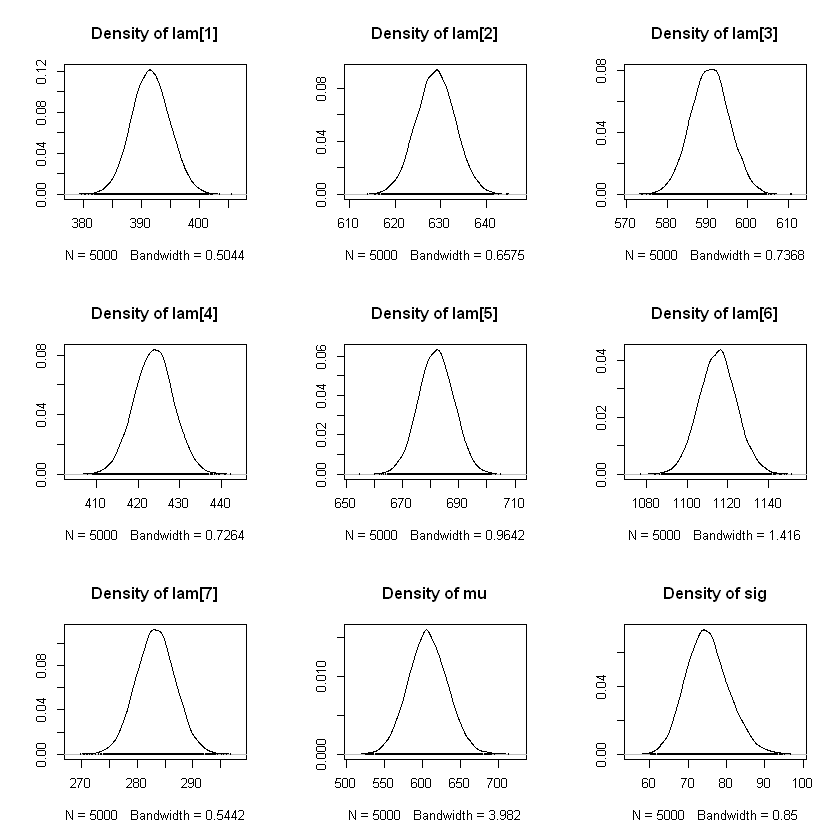

In [14]:
#Create density plot for a specific variable
#library(coda)
#densplot(as.mcmc(mod_sim)[, "beta"])

library(jagsUI)
par(mfrow = c(3, 3))
densplot(mod_sim)



In [ ]:
#Create density plot for a specific variable
#library(coda)
#densplot(as.mcmc(mod_sim)[, "beta"])


,lam[1],lam[2],lam[3],lam[4],lam[5],lam[6],lam[7],mu,sig
Lag 0,1.000000000,1.0000000000,1.000000000,1.000000000,1.000000000,1.0000000000,1.000000000,1.000000000,1.000000000
Lag 1,-0.016290443,-0.0198606050,0.001002684,-0.009970487,0.003358555,0.0196828325,-0.006467072,0.401058403,0.409229362
Lag 5,0.000249243,-0.0003403046,-0.007625921,-0.005566338,-0.013390713,0.0004250693,-0.005797561,0.008700381,0.016498832
Lag 10,-0.011576397,0.0058168010,0.006653193,-0.004705302,0.012685462,0.0058392753,0.005795769,-0.015357254,-0.006828845
Lag 50,-0.006857050,0.0030661882,-0.014329754,0.012460788,0.001385289,-0.0011220638,-0.007800190,0.002650107,0.009335136


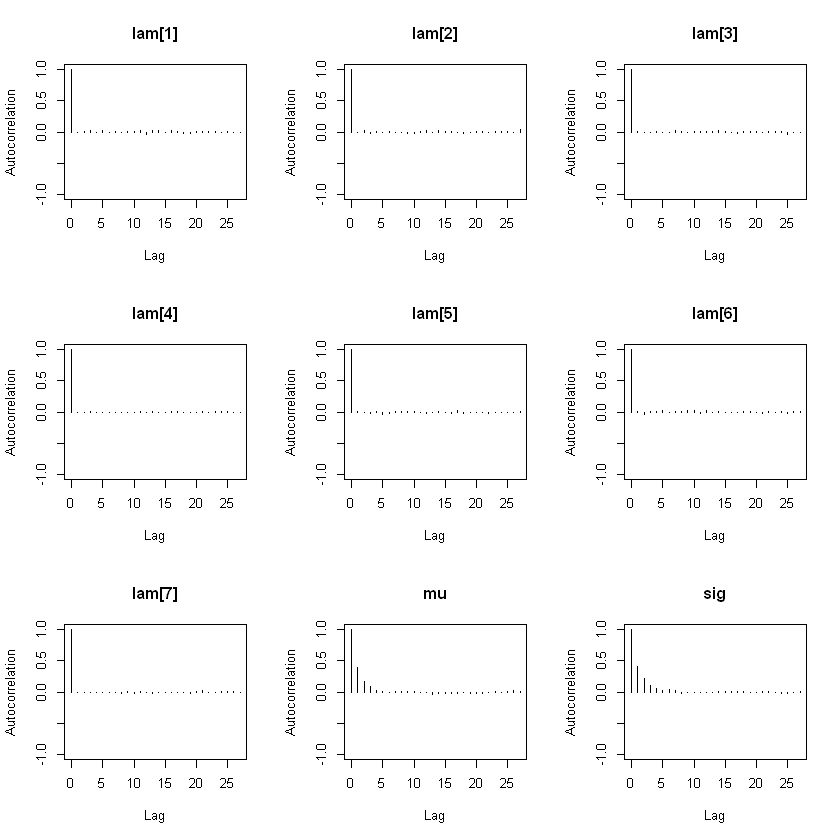

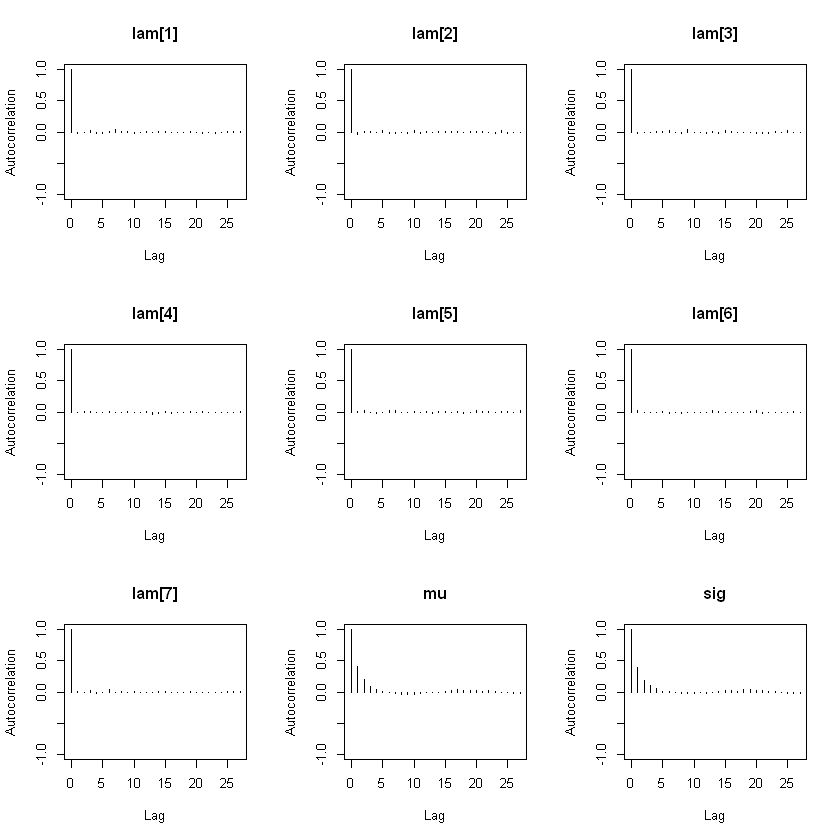

lam[1]    lam[2]    lam[3]    lam[4]    lam[5]    lam[6]    lam[7]        mu 
15058.692 15595.750 14810.446 15000.000 15240.445 15566.900 15018.558  5981.237 
      sig 
 5829.830

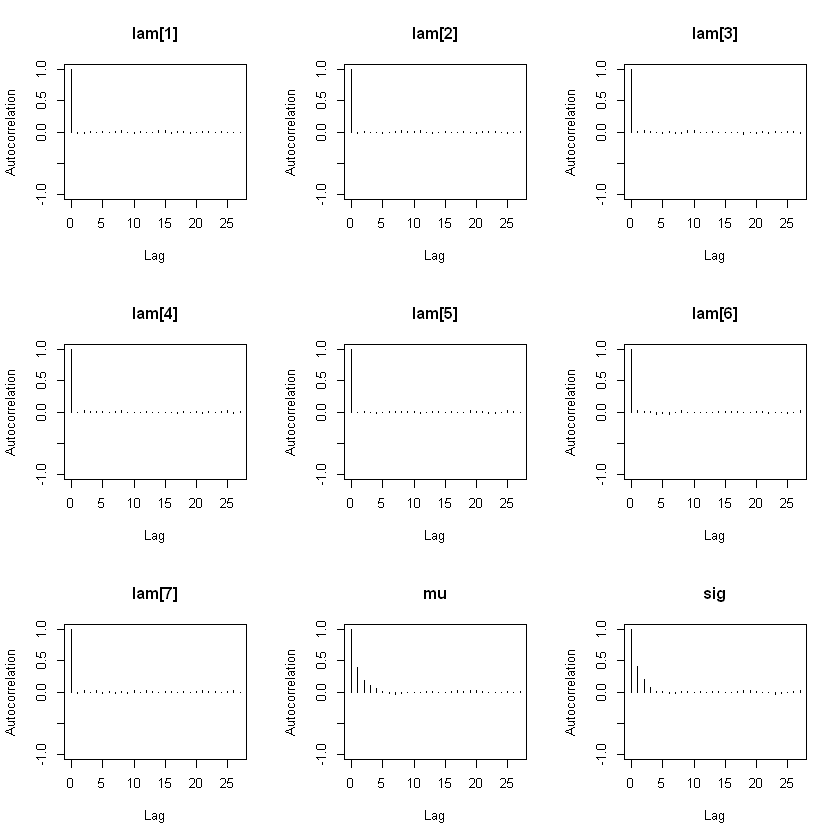

In [15]:
#gelman.diag(mod_sim)
par(mfrow = c(4, 4))
autocorr.diag(mod_sim)
autocorr.plot(mod_sim)
effectiveSize(mod_sim)

In [16]:
effectiveSize(mod_sim)

lam[1]    lam[2]    lam[3]    lam[4]    lam[5]    lam[6]    lam[7]        mu 
15058.692 15595.750 14810.446 15000.000 15240.445 15566.900 15018.558  5981.237 
      sig 
 5829.830

In [17]:
## observation level residuals
(pm_params = colMeans(mod_csim))

lam[1]     lam[2]     lam[3]     lam[4]     lam[5]     lam[6]     lam[7] 
 391.62304  628.87520  590.65011  423.81844  682.00015 1115.09673  283.32892 
        mu        sig 
 607.88031   75.09725

In [18]:
table(df_hm2$artist5)


 1  2  3  4  5  6  7 
37 35 26 19 17 13 23 

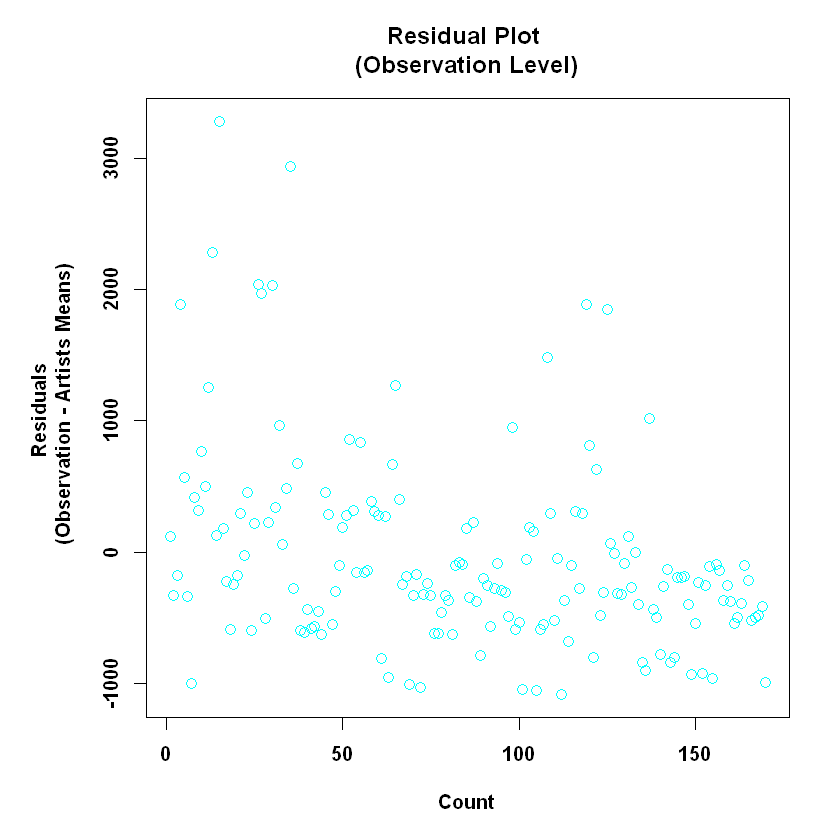

In [19]:
# For equal weight, the following is the code
#yhat = rep(pm_params[1:7], each=30)

# For uneven weight, the following is the code

# Define the number of observations in each group
n <- c(37, 35, 26, 19, 17,13,23)

# Sample from pm_params for each group
yhat <- unlist(lapply(n, function(x) sample(pm_params[1:7], x, replace = TRUE)))

resid = df_hm2$streams_m - yhat

par(font.main = 2, font.lab = 2, font.axis = 2)
par(mar = c(5, 6, 4, 2) + 0.1)

plot(resid, 
     main="Residual Plot \n (Observation Level) ",
     xlab = "Count",
     ylab = "Residuals \n (Observation - Artists Means)",
     col = "cyan",
     cex = 1.2)

#main="Different boxplots for Each Mode (All)",
#xlab="Stream Volume (millions)",
#ylab="Mode",
#col="lightgreen",
#horizontal = TRUE,
#las=1,
#notch = FALSE,
#border="brown"
#)

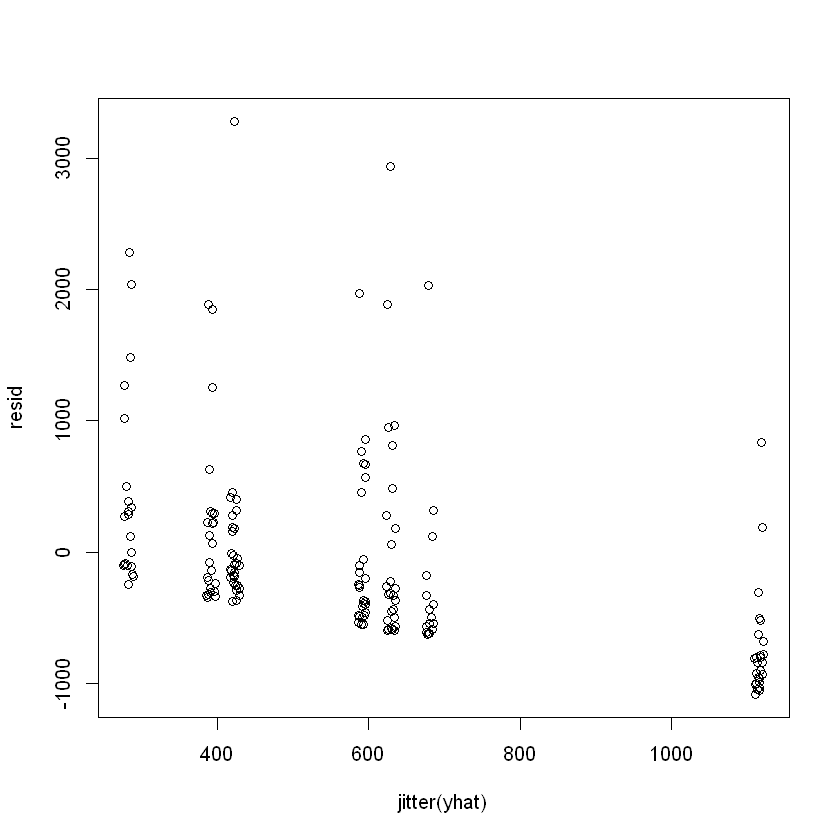

In [20]:
plot(jitter(yhat), resid)

In [21]:
var(resid[yhat<300])

[1] 555467

In [22]:
var(resid[yhat>1000])

[1] 178128.3

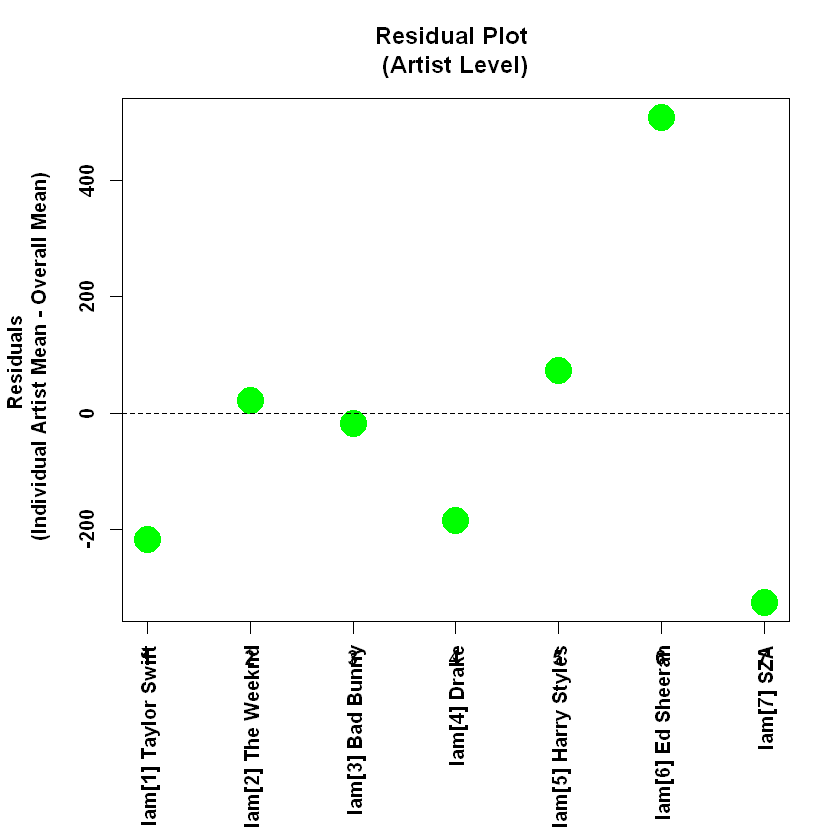

In [48]:
## location level residuals
lam_resid = pm_params[1:7] - pm_params["mu"]

par(font.main = 2, font.lab = 2, font.axis = 2)
par(mar = c(9, 5, 4, 2) + 0.1)

plot(lam_resid,
     main="Residual Plot \n (Artist Level) ",
     xlab = "",
     ylab = "Residuals \n (Individual Artist Mean - Overall Mean)",
     col = "green",
     cex = 3,
     pch=16)
axis(1, at = 1:length(lam_resid), labels = c("lam[1] Taylor Swift", "lam[2] The Weeknd", "lam[3] Bad Bunny", 
                                             "lam[4] Drake", "lam[5] Harry Styles", "lam[6] Ed Sheeran",
                                             "lam[7] SZA"), las=3)
abline(h=0, lty=2)

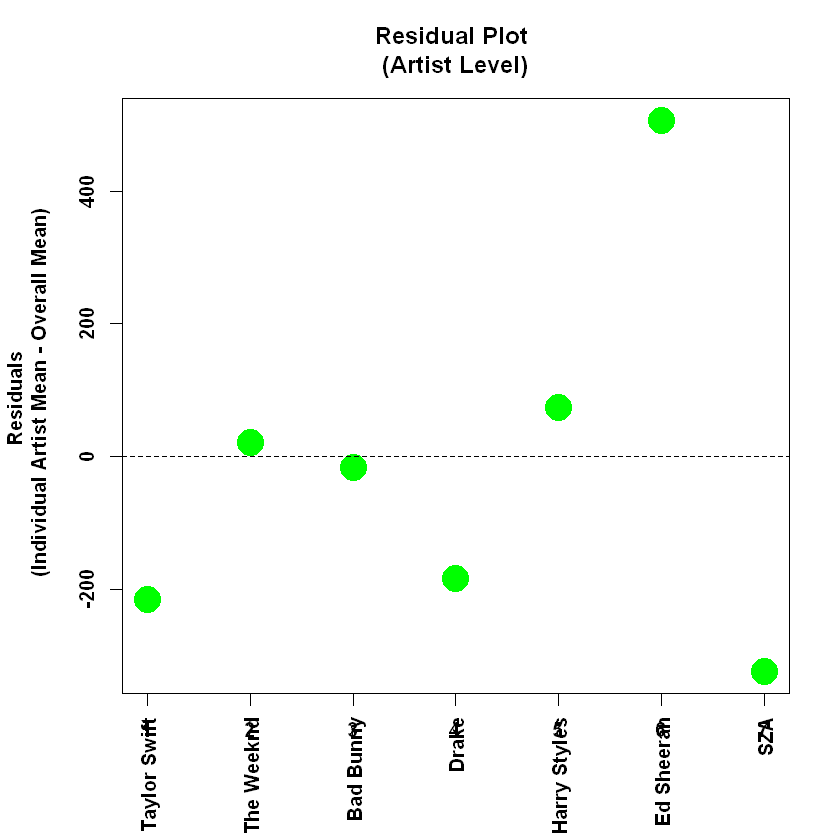

In [24]:
## location level residuals
lam_resid = pm_params[1:7] - pm_params["mu"]

par(font.main = 2, font.lab = 2, font.axis = 2)
par(mar = c(6, 5, 4, 2) + 0.1)

plot(lam_resid,
     main="Residual Plot \n (Artist Level) ",
     xlab = "",
     ylab = "Residuals \n (Individual Artist Mean - Overall Mean)",
     col = "green",
     cex = 3,
     pch=16)
axis(1, at = 1:length(lam_resid), labels = c("Taylor Swift", "The Weeknd", "Bad Bunny", "Drake",
                                             "Harry Styles", "Ed Sheeran", "SZA"), las=3)
abline(h=0, lty=2)

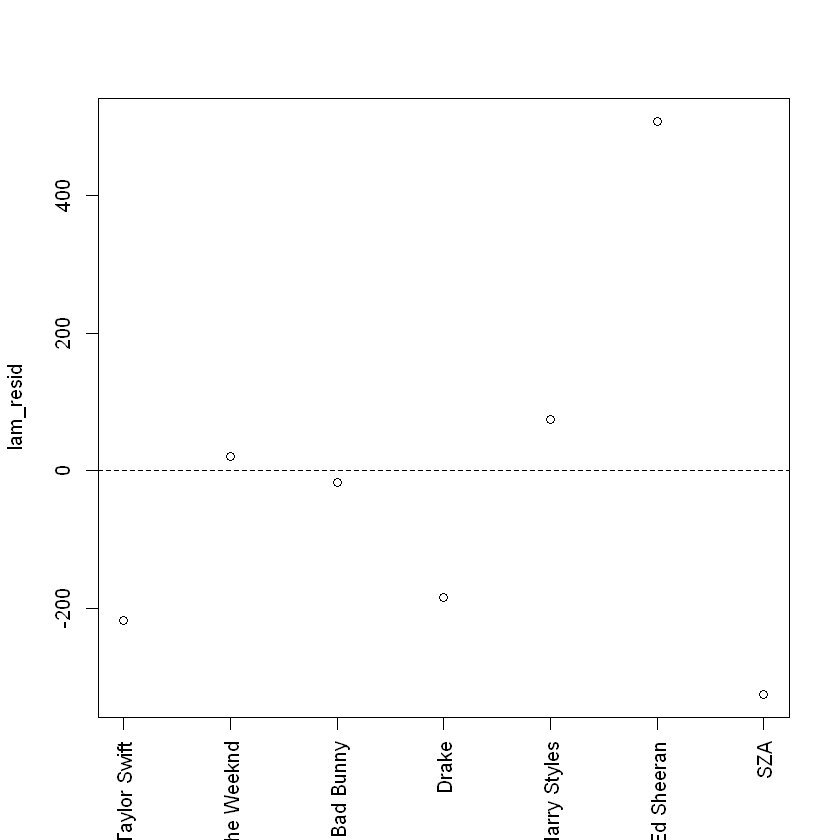

In [25]:
plot(lam_resid, xaxt = "n", xlab = "")
abline(h=0, lty=2)
axis(1, at = 1:length(lam_resid), labels = c("Taylor Swift", "The Weeknd", "Bad Bunny", "Drake",
                                             "Harry Styles", "Ed Sheeran", "SZA"), las=2)
                

In [26]:
summary(mod_sim)


Iterations = 2001:7000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean     SD Naive SE Time-series SE
lam[1]  391.6  3.256  0.02659        0.02654
lam[2]  628.9  4.244  0.03465        0.03400
lam[3]  590.7  4.768  0.03893        0.03919
lam[4]  423.8  4.689  0.03828        0.03829
lam[5]  682.0  6.224  0.05082        0.05054
lam[6] 1115.1  9.223  0.07531        0.07410
lam[7]  283.3  3.517  0.02871        0.02870
mu      607.9 25.812  0.21075        0.33391
sig      75.1  5.530  0.04516        0.07244

2. Quantiles for each variable:

          2.5%     25%    50%     75%   97.5%
lam[1]  385.36  389.40  391.6  393.79  398.09
lam[2]  620.56  626.03  628.9  631.73  637.28
lam[3]  581.39  587.43  590.6  593.80  600.00
lam[4]  414.66  420.63  423.9  426.95  433.03
lam[5]  669.76  677.76  682.0  686.21  694.15
lam[6] 1097.21 1108.93 1115.1 1121.19 1133.

In [27]:
(n_sim = nrow(mod_csim))

[1] 15000

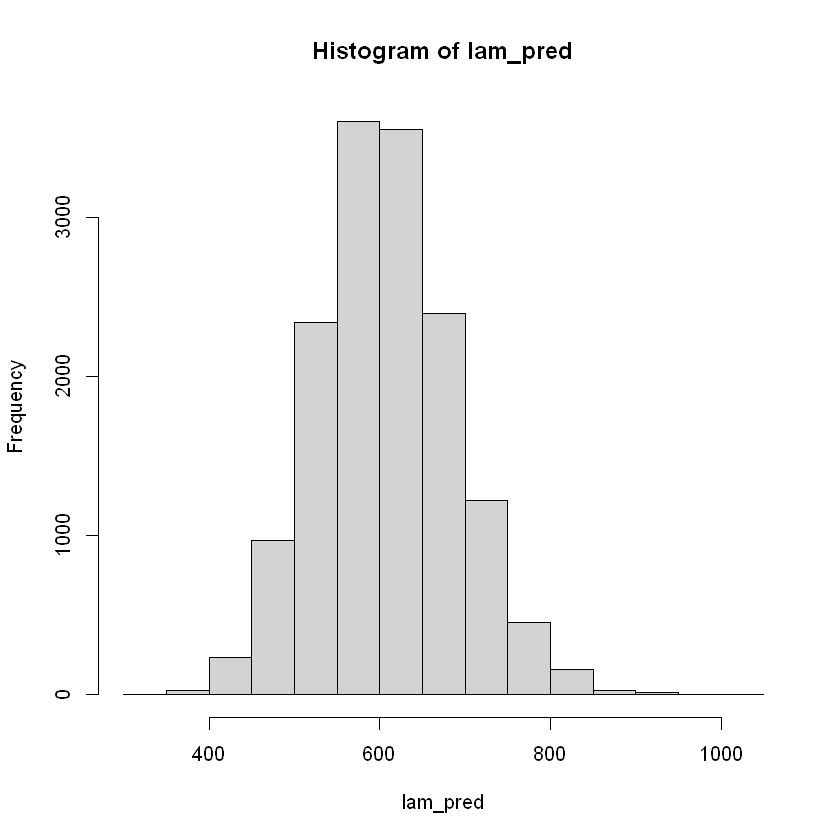

In [28]:
lam_pred = rgamma(n=n_sim, shape=mod_csim[,"mu"]^2/mod_csim[,"sig"]^2, 
                  rate=mod_csim[,"mu"]/mod_csim[,"sig"]^2)
hist(lam_pred)

In [29]:
mean(lam_pred > 800)

[1] 0.01313333

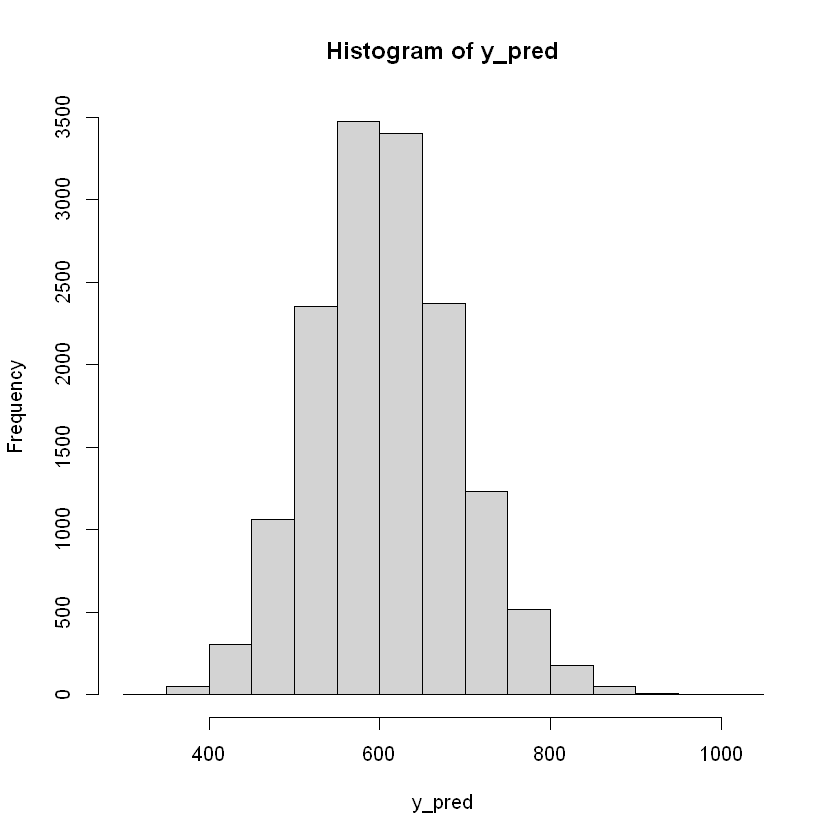

In [30]:
y_pred = rpois(n=n_sim, lambda=lam_pred)
hist(y_pred)

In [31]:
mean(y_pred > 800)

[1] 0.01606667

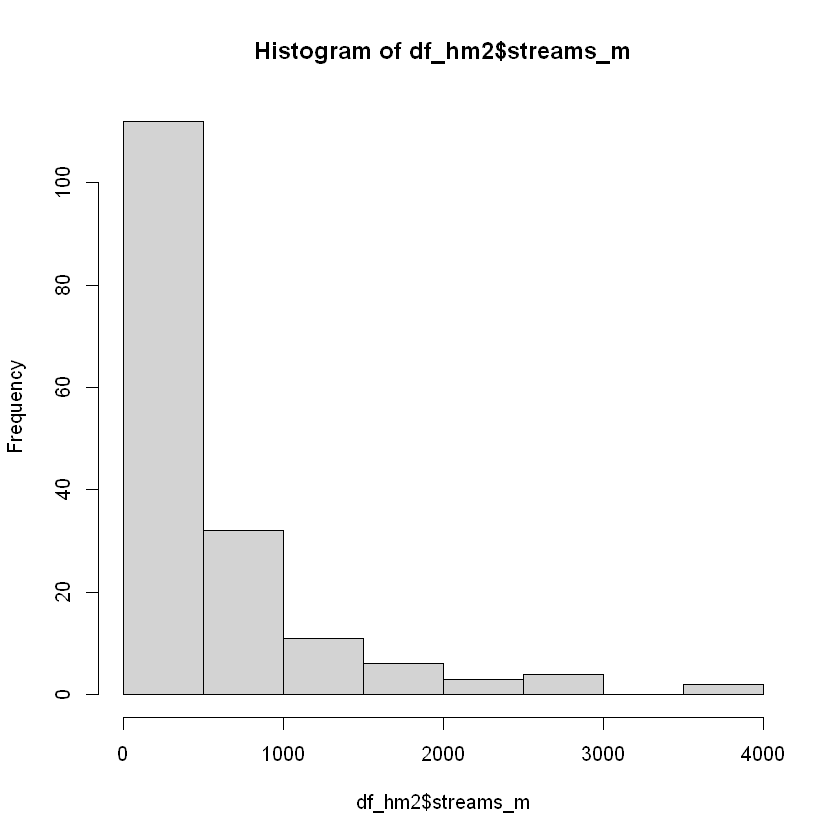

In [32]:
hist(df_hm2$streams_m)

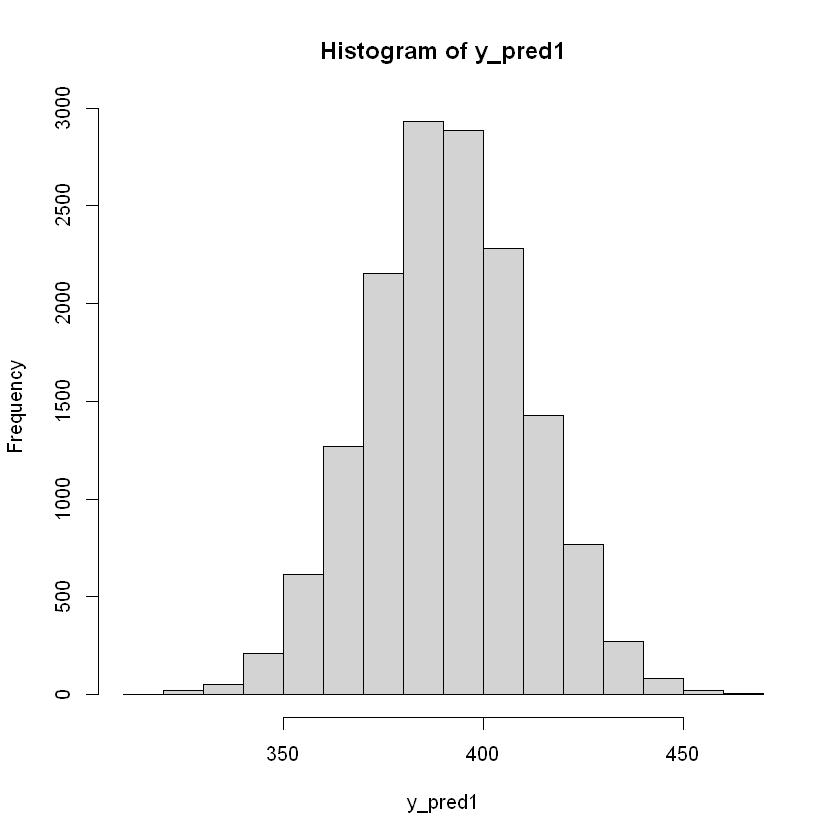

In [33]:
y_pred1 = rpois(n=n_sim, lambda=mod_csim[,"lam[1]"])
hist(y_pred1)

In [50]:
mean(y_pred1 > 400)

[1] 0.324

In [35]:
df_hm2 %>%
  group_by(artist5, released_year) %>%
  summarise(
    count = n(),
    min = min(streams_m, na.rm = TRUE),
    mean = mean(streams_m, na.rm = TRUE),
    median = median(streams_m, na.rm = TRUE),
    max = max(streams_m, na.rm = TRUE),        
    std = sd(streams_m, na.rm =TRUE)
  ) 

`summarise()` has grouped output by 'artist5'. You can override using the
`.groups` argument.


artist5,released_year,count,min,mean,median,max,std
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,2010,1,621,621.0000,621.0,621,NA
1,2012,1,882,882.0000,882.0,882,NA
1,2014,3,786,1084.6667,1113.0,1355,285.55618
1,2017,1,685,685.0000,685.0,685,NA
1,2019,2,185,492.5000,492.5,800,434.87067
1,2020,2,607,709.5000,709.5,812,144.95689
1,2021,2,350,466.5000,466.5,583,164.75588
1,2022,17,121,312.8235,253.0,999,206.72180
1,2023,8,30,46.2500,42.5,68,12.92561


In [36]:
df_hm2 %>%
  group_by(artist5, released_year) %>%
  summarise(
    count = n(),
    min = min(streams_m, na.rm = TRUE),
    mean = mean(streams_m, na.rm = TRUE),
    median = median(streams_m, na.rm = TRUE),
    max = max(streams_m, na.rm = TRUE),        
    std = sd(streams_m, na.rm =TRUE)
  , .groups = "drop") 


artist5,released_year,count,min,mean,median,max,std
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,2010,1,621,621.0000,621.0,621,NA
1,2012,1,882,882.0000,882.0,882,NA
1,2014,3,786,1084.6667,1113.0,1355,285.55618
1,2017,1,685,685.0000,685.0,685,NA
1,2019,2,185,492.5000,492.5,800,434.87067
1,2020,2,607,709.5000,709.5,812,144.95689
1,2021,2,350,466.5000,466.5,583,164.75588
1,2022,17,121,312.8235,253.0,999,206.72180
1,2023,8,30,46.2500,42.5,68,12.92561


In [ ]:
df_hm2$artist5[df_hm2$artist4 == 'Taylor Swift'] <-1
df_hm2$artist5[df_hm2$artist4 == 'The Weeknd'] <-2
df_hm2$artist5[df_hm2$artist4 == 'Bad Bunny'] <-3
df_hm2$artist5[df_hm2$artist4 == 'Drake'] <-4
df_hm2$artist5[df_hm2$artist4 == 'Harry Styles'] <-5
df_hm2$artist5[df_hm2$artist4 == 'Ed Sheeran'] <-6
df_hm2$artist5[df_hm2$artist4 == 'SZA'] <-7

In [ ]:
df_ts %>%
  group_by(artist4) %>%
  summarise(
    min = min(streams_m, na.rm = TRUE),
    mean = mean(streams_m, na.rm = TRUE),
    median = median(streams_m, na.rm = TRUE),
    max = max(streams_m, na.rm = TRUE),        
    std = sd(streams_m, na.rm =TRUE)
  ) 

In [37]:
# Assume you have a named vector where the names are the numbers and the values are the artist names
artist_names <- c("1" = "Taylor Swift", "2" = "The Weeknd", "3" = "Bad Bunny",
                  "4" = "Drake", "5" = "Harry Styles", "6" = "Ed Sheeran",
                  "7" = "SZA")

# Use the mutate function to replace the numbers with artist names
df_hm2 <- df_hm2 %>%
  mutate(artist5 = artist_names[as.character(artist5)])

# Now you can group by artist5 and released_year and calculate the statistics
df_hm2 %>%
  group_by(artist5, released_year) %>%
  summarise(
    count = n(),
    min = min(streams_m, na.rm = TRUE),
    mean = mean(streams_m, na.rm = TRUE),
    median = median(streams_m, na.rm = TRUE),
    max = max(streams_m, na.rm = TRUE),        
    std = sd(streams_m, na.rm =TRUE)
  , .groups = "drop") 


artist5,released_year,count,min,mean,median,max,std
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
Bad Bunny,2019,1,1304,1304.0000,1304.0,1304,NA
Bad Bunny,2020,3,312,920.0000,685.0,1763,753.50448
Bad Bunny,2021,1,1260,1260.0000,1260.0,1260,NA
Bad Bunny,2022,18,212,498.4444,370.5,1264,301.40265
Bad Bunny,2023,3,250,352.6667,303.0,505,134.55978
Drake,2016,1,2713,2713.0000,2713.0,2713,NA
Drake,2021,3,489,558.6667,593.0,594,60.33517
Drake,2022,14,93,247.7143,180.5,618,184.87685
Drake,2023,1,175,175.0000,175.0,175,NA


In [38]:
table(df_hm2$artist5)


   Bad Bunny        Drake   Ed Sheeran Harry Styles          SZA Taylor Swift 
          26           19           13           17           23           37 
  The Weeknd 
          35 